## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

This is a revised veriosn of the project from Udacity Machine Learning Engineer Nanodegree. In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

Try to answer the following questions.  
可以使用中文回答。

This project requires **Python** and the following Python libraries installed:

- [NumPy](http://www.numpy.org/)
- [Pandas](http://pandas.pydata.org)
- [matplotlib](http://matplotlib.org/)
- [scikit-learn](http://scikit-learn.org/stable/) version: 0.18+

You will also need to have software installed to run and execute a [Jupyter Notebook](https://jupyter.org/install)

If you do not have Python installed yet, it is highly recommended that you install the [Anaconda](https://www.anaconda.com/distribution/) distribution of Python, which already has the above packages and more stuff included.

Or, you can put this file on the [Google colab](https://colab.research.google.com/) environment. It's a free Jupyter notebook environment that requires no setup and runs entirely on the cloud.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project is named as *housing.csv*, which originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.  
**Note:** The sci-kit learn module also provides this dataset. You can obtain it by invoking `sklearn.datasets.load_boston()`. However, **please do not use that dataset in this project because it's somewhat unorganized.**  
For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.





In [83]:
# remember to run this code cell if you cannot see your google drive on the left slidebar
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported printed out after this code block.  
Note: If you run this notebook file locally, you can load *housing.csv* by simply putting this file and the csv file at the same directory.

In [91]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Boston housing dataset
# TODO: load the csv file 
data = pd.read_csv('./housing.csv')
prices = data['MEDV']  # this is what we want to preict
features = data.drop('MEDV', axis = 1)  # remove this feature because it is our target
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

**Hint**: Go to [NumPy's doc](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html) to discover the usage of the functions you need.

In [92]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

You can run the code cell below to examine some samples.


In [93]:
# randomly pick up 5 samples
indices = np.random.choice(data.shape[0], 5)
data.iloc[indices]

,RM,LSTAT,PTRATIO,MEDV
92,6.442,8.16,18.2,480900.0
248,7.454,3.11,15.9,924000.0
227,6.086,10.88,17.4,504000.0
399,6.782,25.79,20.2,157500.0
135,6.335,16.96,21.2,380100.0


Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Write your answer here: **

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

Go to [Sci-kit Learn webpage](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) to see how to use the `r2_score` function..

In [94]:
# TODO: Import 'r2_score' function from sklearn.metrics
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict' using r2_score
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [95]:
# Calculate the performance of this model
y_true = [3, -0.5, 2, 7, 4.2]
y_predict = [2.5, 0.0, 2.1, 7.8, 5.3]
score = performance_metric(y_true, y_predict)
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

**Hint:**  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Write your answer here: **

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [96]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO:  Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2)

# Success
if X_train is not None:
  print("Training and testing split was successful.")
else:
  print("Something wrong. Data are not splitted.")
# Print out the shape of training and testing data

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

### Learning Curves
The following code cell produces four graphs for a [decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question. You don't have to modify anything in this code cell.  

**Note:** If you do not know what a decision tree model is, please refer [here](https://en.wikipedia.org/wiki/Decision_tree).

In [97]:
def learn_model(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    sizes = np.arange(10, len(X_train), 50)
    
    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.arange(10, len(X_train)*0.8, 50)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1, 3, 6, 10]):
        
        from sklearn.tree import DecisionTreeRegressor
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)
        
        # Calculate the training and testing scores
        from sklearn.model_selection import learning_curve
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = 5, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    plt.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    plt.tight_layout()
    plt.show()

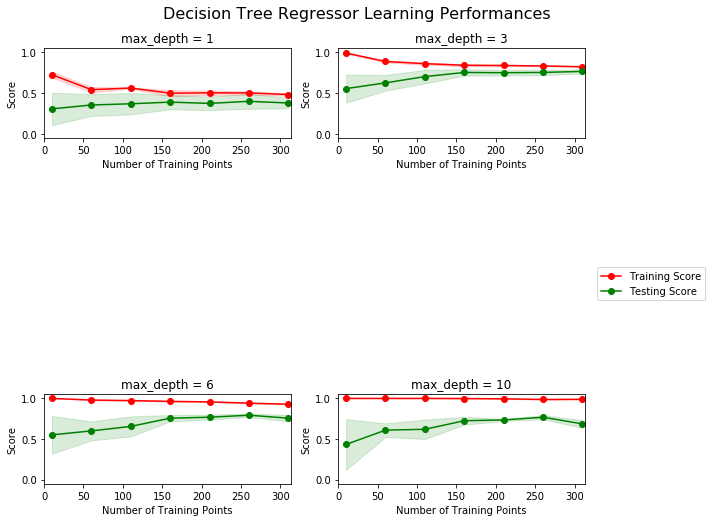

In [98]:
# Produce learning curves for varying training set sizes and maximum depths
learn_model(X_train, y_train)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Write your answer here: **

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

In [99]:
def model_complexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)
    
    from sklearn.tree import DecisionTreeRegressor

    # Create 10 cross-validation sets for training and testing
    # Calculate the training and testing scores
    from sklearn.model_selection import validation_curve
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = 10, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.xticks(np.arange(0, 11, step=1))
    plt.show()

Now we call this function to plot the curve.

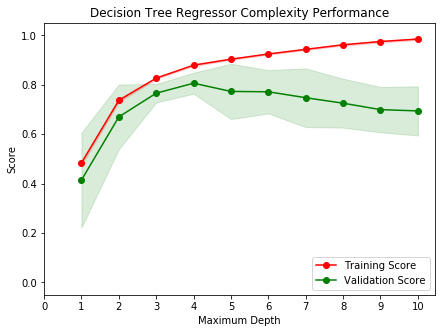

In [100]:
model_complexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Write your answer here: **

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Write your answer here: **

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Write your answer here: **

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train two models: the **linear regression** and **decision tree regression**. Choose a `max_depth` for the decision tree regressor according to your observations.

In [101]:
# TODO: Import 'LinearRegression'
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# TODO: Create your regressor objects
linear_regressor = LinearRegression()
dt_regressor = DecisionTreeRegressor(max_depth=4)

# TODO: fit your model
linear_regressor.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Making Predictions
### Implementation: Evaluate your model
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data.
Use the splitted test data to evaluate your model 

In [102]:
# TODO: use X_test to make predictions
y_lr_predict = linear_regressor.predict(X_test)
y_dt_predict = dt_regressor.predict(X_test)

#calculate the score using the performance_metric you wrote above
score_lr = performance_metric(y_test, y_lr_predict)
score_dt = performance_metric(y_test, y_dt_predict)

print("Linear regression model has a coefficient of determination, R^2, of {:.3f}.".format(score_lr))
print("Decision tree regression model has a coefficient of determination, R^2, of {:.3f}.".format(score_dt))

Linear regression model has a coefficient of determination, R^2, of 0.692.
Decision tree regression model has a coefficient of determination, R^2, of 0.757.


**Hint:** The answer comes from the output of the code snipped above.

**Write your answer here: **

### Question 8 - Predicting Selling Prices
### Implementation: use one of the above models to predict prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [103]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
         [4, 32, 22], # Client 2
         [8, 3, 12]]  # Client 3

# Apply either one model to show predictions
for i, price in enumerate(linear_regressor.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $367,653.79
Predicted selling price for Client 2's home: $-21,104.76
Predicted selling price for Client 3's home: $861,406.75


**Write your answer here: **

### Implementation: cross validation

For the code cell below, you will need to implement the cross validation technique to obtain the predictions of **all data**. Use the `cross_val_predict` method in `sklearn.model_selection` to accomplish this. You can get more information from [*here*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html). Plot a figure which shows the relation between the true price and the predicted price for all data. You have to show the results of both models you applied above. 

/Users/taolin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/taolin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


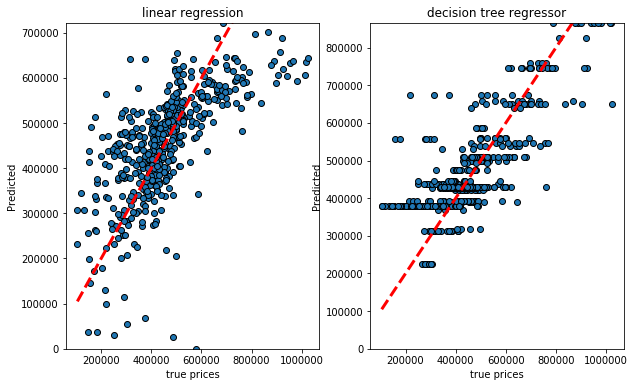

In [104]:
# TODO: Use cross validation function to get the predictions of all data
from sklearn.model_selection import cross_val_predict

pred_linear_regressor = cross_val_predict(linear_regressor, features, prices)
pred_dt_regressor = cross_val_predict(dt_regressor, features, prices)

# plot a figure of true price vs. prediction for both models
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].set_title("linear regression")
ax[0].scatter(prices, pred_linear_regressor, edgecolors=(0, 0, 0))
ax[0].plot([prices.min(), prices.max()], [prices.min(), prices.max()], 'r--', lw=3)
ax[0].set_ylim([0, pred_linear_regressor.max()])
ax[0].set_xlabel('true prices')
ax[0].set_ylabel('Predicted')
ax[1].set_title("decision tree regressor")
ax[1].scatter(prices, pred_dt_regressor, edgecolors=(0, 0, 0))
ax[1].plot([prices.min(), prices.max()], [prices.min(), prices.max()], 'r--', lw=3)
ax[1].set_ylim([0, pred_dt_regressor.max()])
ax[1].set_xlabel('true prices')
ax[1].set_ylabel('Predicted')
plt.show()

### Question 9 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Try to split your data several times and see the performance. Some questions to answering:
- Which model you preferred? Why?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Write your answer here: **

At last, convert this ipynb file to html and submit your html file.
You can get more information about how to convert the ipynb file to html file from [here](https://torbjornzetterlund.com/how-to-save-a-google-colab-notebook-as-html/).